In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
### Set your path to the folder containing the .csv files
PATH = './' # Use your path

### Fetch all files in path
fileNames = os.listdir(PATH)

### Filter file name list for files ending with .csv
fileNames = [file for file in fileNames if '.csv' in file]
fileNames


['ObsAvoid_thrusters.csv',
 'ObsAvoid_dist.csv',
 'bonus_thrusters.csv',
 'bonus_imu.csv',
 'ObsAvoid_imu.csv',
 'bonus_dist.csv']

No handles with labels found to put in legend.


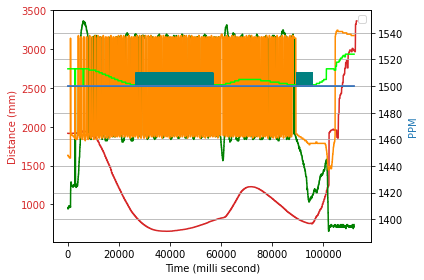

In [20]:

# start index
idx = 0
### Loop over all files
for file in fileNames:

    # if file.find("_g_") != -1:  #skip files with this sub string
    #     continue
    if file.find("bonus_dist") == -1:    #skip files without this sub string
        continue

    ### Read .csv file and append to list
    df_d = pd.read_csv(PATH + file, index_col = None)
    df_d['%time'] = (df_d['%time'] - df_d['%time'].iloc[0]) / 1e6   #nano second to ms

    df_pwm = pd.read_csv(PATH + file.replace("_dist", "_thrusters"), index_col = None).drop(
                                                        columns=['field.channels0','field.channels1'])
    df_pwm['%time'] = (df_pwm['%time'] - df_pwm['%time'].iloc[0]) / 1e6 #nano second to ms

    

    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Time (milli second)')
    ax1.set_ylabel('Distance (mm)', color=color)
    ax1.plot(df_d['%time'],df_d['field0'], color=color) #, label=file.replace("depth_control_12v_", "").replace(".csv", "").replace("_Depth", "").replace("_no_wall_2", "").replace("kp_p", "kp"))
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('PPM', color=color)  # we already handled the x-label with ax1
    ax2.plot(df_pwm['%time'],df_pwm['field.channels2'], color='green')
    ax2.plot(df_pwm['%time'],df_pwm['field.channels3'], color='darkorange')
    ax2.plot(df_pwm['%time'],df_pwm['field.channels4'], color='lime')
    ax2.plot(df_pwm['%time'],df_pwm['field.channels5'], color='teal')
    ax2.plot(df_pwm['%time'],df_pwm['field.channels6'], color='violet')
    ax2.plot(df_pwm['%time'],df_pwm['field.channels7'], color=color)
    # ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

### Generate the plot
# plt.ylabel("Depth(m)")
# plt.xlabel("Time Steps")
plt.legend(loc="best")
# plt.xlim(0, 37250)
# plt.ylim(-0.68, 0.5)
# ax1.axhline(0.5,color='grey',linestyle="--") # y = 0
plt.grid()
plt.show()